# Chrun Modelling
## Introduction
### This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

## Summary Information about the variables and their types in the data
* 1) **Surname :** The surname of the customer
* 2) **CreditScore :** The credit score of the customer
* 3) **Geography :** The country of the customer(Germany/France/Spain)
* 4) **Gender :** The gender of the customer (Female/Male)
* 5) **Age :** The age of the customer
* 6) **Tenure :** The customer's number of years in the in the bank
* 7) **Balance :** The customer's account balance
* 8) **NumOfProducts :** The number of bank products that the customer uses
* 9) **HasCrCard :** Does the customer has a card? (0=No,1=Yes)
* 10) **IsActiveMember :** Does the customer has an active mebership (0=No,1=Yes)
* 11) **EstimatedSalary :** The estimated salary of the customer
* 12) **Exited :** Churned or not? (0=No,1=Yes)

## Our Goal:
* > First: we will explore and clean the data. Deep understanding and data cleaning is so important for making good predictions.
* > Second: we will make lots of visualization for deep understanding of the data, After that visualizations we will decide if we need creatig new variables or not.
* > Finally: we will use Machine Learning Algorithms for make predictions about if a customer left the bank or not.

**Installing the Libraries**

In [1]:
# for basic mathematics operation 
import numpy as np
import pandas as pd
from pandas import plotting

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings('ignore')

import plotly.express as px

**Reading the Dataset**

In [2]:
# importing the dataset

data = pd.read_csv('Churn_Modelling.csv')

dat = ff.create_table(data.head())

py.iplot(dat)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Row.No     10000 non-null  int64  
 1   Id         10000 non-null  int64  
 2   Surname    10000 non-null  object 
 3   Score      10000 non-null  int64  
 4   Nation     10000 non-null  object 
 5   Gender     10000 non-null  object 
 6   Age        10000 non-null  int64  
 7   Tenure     10000 non-null  int64  
 8   Balance    10000 non-null  float64
 9   Products   10000 non-null  int64  
 10  HasCard    10000 non-null  int64  
 11  IsActiver  10000 non-null  int64  
 12  ES         10000 non-null  float64
 13  Exited     10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
# describing the data

desc = ff.create_table(data.describe().T.applymap("{0:.02f}".format),index = True)
py.iplot(desc)

In [8]:
# checking if there is any NULL data

data.isnull().any()

Row.No       False
Id           False
Surname      False
Score        False
Nation       False
Gender       False
Age          False
Tenure       False
Balance      False
Products     False
HasCard      False
IsActiver    False
ES           False
Exited       False
dtype: bool

In [9]:
data.shape

(10000, 14)

In [10]:
numeric_features = data.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Row.No', 'Id', 'Score', 'Age', 'Tenure', 'Balance', 'Products',
       'HasCard', 'IsActiver', 'ES', 'Exited'],
      dtype='object')

In [11]:
numeric_features.head()

Row.No        Id  Score  Age  Tenure    Balance  Products  HasCard  \
0       1  15634602    619   42       2       0.00         1        1   
1       2  15647311    608   41       1   83807.86         1        0   
2       3  15619304    502   42       8  159660.80         3        1   
3       4  15701354    699   39       1       0.00         2        0   
4       5  15737888    850   43       2  125510.82         1        1   

   IsActiver         ES  Exited  
0          1  101348.88       1  
1          1  112542.58       0  
2          0  113931.57       1  
3          0   93826.63       0  
4          1   79084.10       0

In [3]:
df = data.copy()

In [4]:
df.drop(["Row.No",'Id','Surname'],axis=1, inplace=True)

In [7]:
df.skew()

Score       -0.071607
Age          1.011320
Tenure       0.010991
Balance     -0.141109
Products     0.745568
HasCard     -0.901812
IsActiver   -0.060437
ES           0.002085
Exited       1.471611
dtype: float64

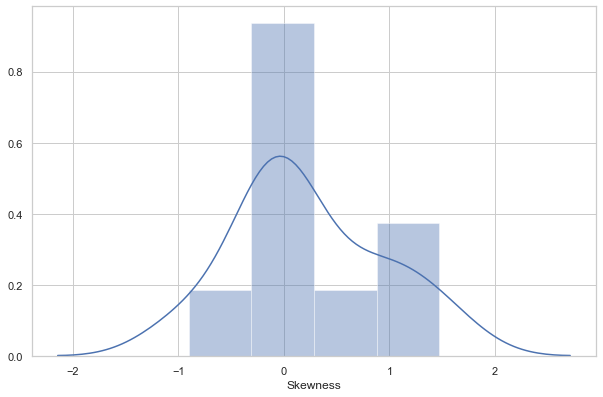

In [14]:
sns.set(style = 'whitegrid')
plt.rcParams['figure.figsize'] = (9, 6)
sns.distplot(df.skew(),axlabel ='Skewness')

plt.show()

In [17]:
df.kurt()

Score       -0.425726
Age          1.395347
Tenure      -1.165225
Balance     -1.489412
Products     0.582981
HasCard     -1.186973
IsActiver   -1.996747
ES          -1.181518
Exited       0.165671
dtype: float64

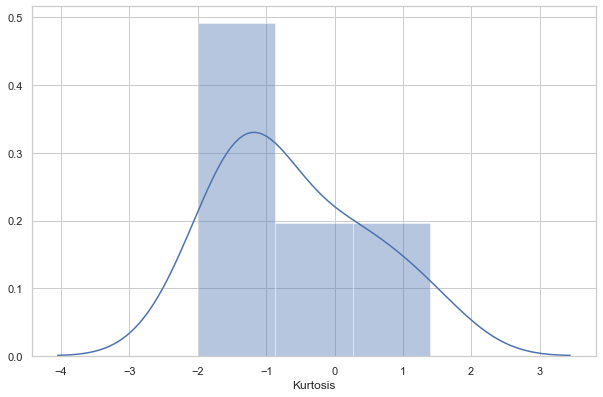

In [15]:
sns.set(style = 'whitegrid')
plt.rcParams['figure.figsize'] = (9, 6)
sns.distplot(df.kurt(),axlabel ='Kurtosis')
plt.show()

## Data Visualization

In [20]:
ff.create_table(df.head())

### Correlation Heat Map

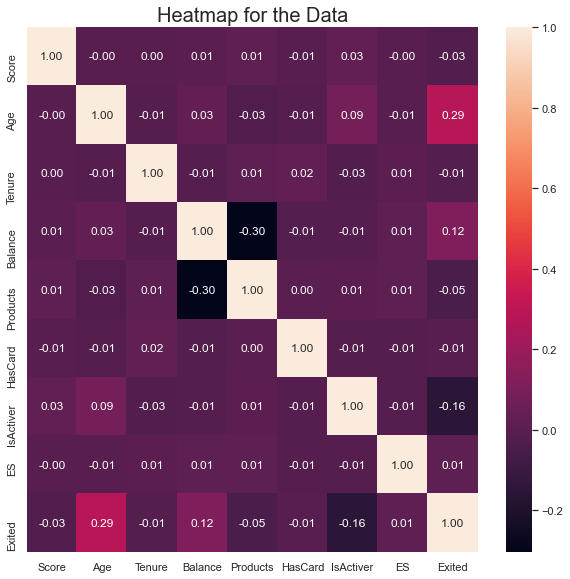

In [17]:
correlation = df.corr()
sns.set(style = 'whitegrid')
plt.rcParams['figure.figsize'] = (9, 9)
sns.heatmap(correlation, annot = True,fmt = ".2f")
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

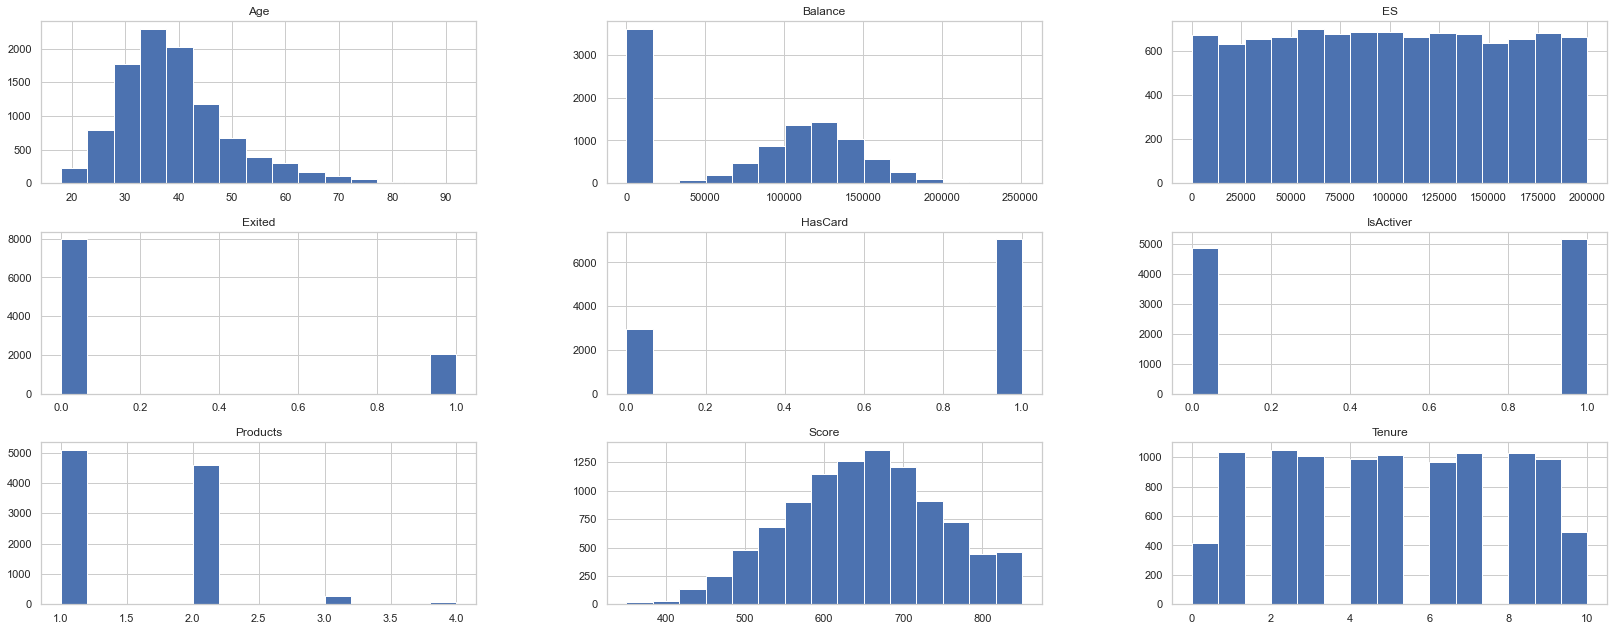

In [18]:
sns.set(style = 'whitegrid')
plt.rcParams['figure.figsize'] = (25, 10)
df.hist(bins = 15)
plt.show()

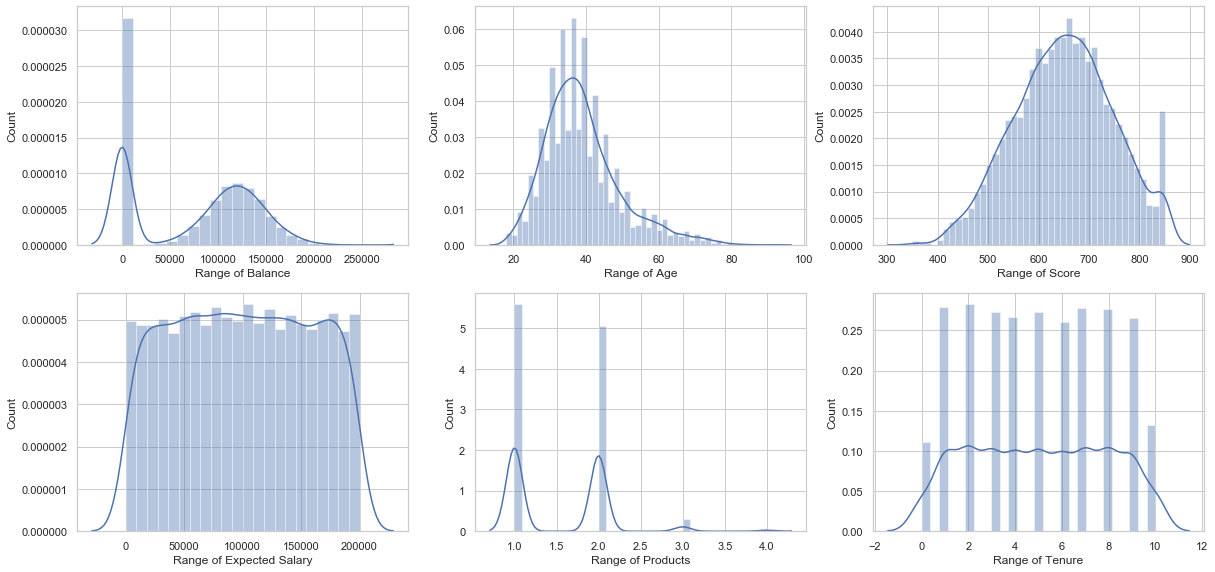

In [31]:
plt.rcParams['figure.figsize'] = (18, 9)
sns.set(style = 'whitegrid')

plt.subplot(2, 3, 1)
sns.distplot(df['Balance'])
#plt.title('Distribution of Balance', fontsize = 20)
plt.xlabel('Range of Balance')
plt.ylabel('Count')


plt.subplot(2, 3, 2)
sns.distplot(data['Age'])
#plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')


plt.subplot(2, 3, 3)
sns.distplot(data['Score'])
#plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Score')
plt.ylabel('Count')


plt.subplot(2, 3, 4)
sns.distplot(data['ES'])
#plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Expected Salary')
plt.ylabel('Count')

plt.subplot(2, 3, 5)
sns.distplot(data['Products'])
#plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Products')
plt.ylabel('Count')

plt.subplot(2, 3, 6)
sns.distplot(data['Tenure'])
#plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Tenure')
plt.ylabel('Count')

plt.show()

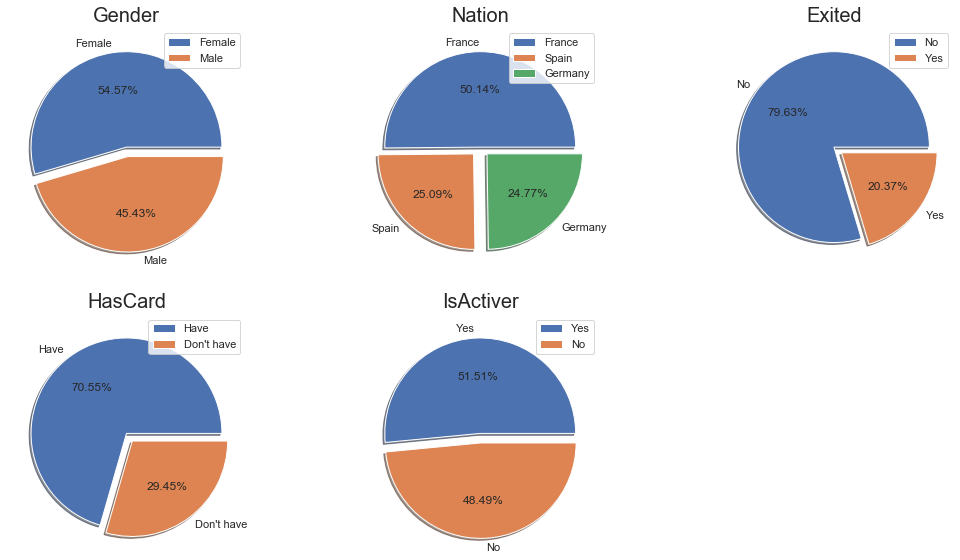

In [32]:
plt.rcParams['figure.figsize'] = (16, 9)

labels1 = ['Female', 'Male']
labels2 = ['France', 'Spain','Germany']
labels3 = ['No','Yes']
labels4 = ['Have',"Don't have"]
labels5 = ['Yes','No']
size1 = data['Gender'].value_counts()
size2 = data['Nation'].value_counts()
size3 = data['Exited'].value_counts()
size4 = data['HasCard'].value_counts()
size5 = data['IsActiver'].value_counts()
explode1 = [0, 0.1]
explode2 = [0, 0.1,0.1]
explode3 = [0, 0.1]
explode4 = [0, 0.1]
explode5 = [0, 0.1]


plt.subplot(2, 3, 1)
plt.pie(size1, explode = explode1, labels = labels1, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()

plt.subplot(2, 3, 2)
plt.pie(size2, explode = explode2, labels = labels2, shadow = True, autopct = '%.2f%%')
plt.title('Nation', fontsize = 20)
plt.axis('off')
plt.legend()

plt.subplot(2, 3, 3)
plt.pie(size3, explode = explode3, labels = labels3, shadow = True, autopct = '%.2f%%')
plt.title('Exited', fontsize = 20)
plt.axis('off')
plt.legend()

plt.subplot(2, 3, 4)
plt.pie(size4, explode = explode4, labels = labels4, shadow = True, autopct = '%.2f%%')
plt.title('HasCard', fontsize = 20)
plt.axis('off')
plt.legend()

plt.subplot(2, 3, 5)
plt.pie(size5, explode = explode5, labels = labels5, shadow = True, autopct = '%.2f%%')
plt.title('IsActiver', fontsize = 20)
plt.axis('off')
plt.legend()


plt.show()

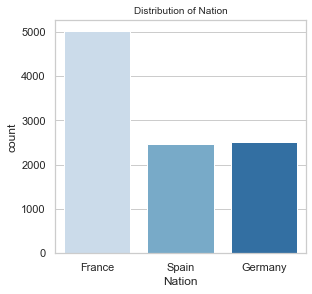

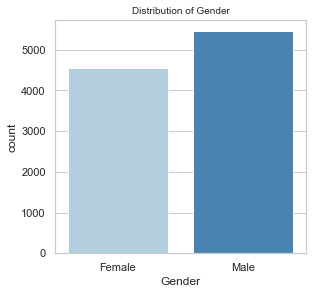

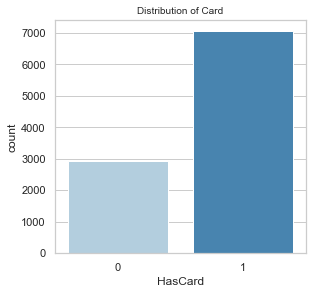

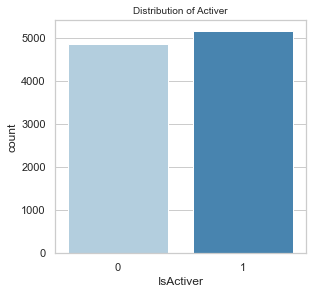

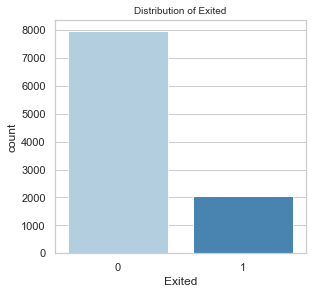

In [33]:
plt.rcParams['figure.figsize'] = (4, 4)
sns.set(style = 'whitegrid')


sns.countplot(x=df['Nation'], data = df,palette = 'Blues')
plt.title('Distribution of Nation', fontsize = 10)

plt.show()
sns.countplot(x=df['Gender'], data = df,palette = 'Blues')
plt.title('Distribution of Gender', fontsize = 10)
plt.show()
sns.countplot(x=df['HasCard'], data = df,palette = 'Blues')
plt.title('Distribution of Card', fontsize = 10)
plt.show()
sns.countplot(x=df['IsActiver'], data = df,palette = 'Blues')
plt.title('Distribution of Activer', fontsize = 10)
plt.show()
sns.countplot(x=df['Exited'], data = df,palette = 'Blues')
plt.title('Distribution of Exited', fontsize = 10)
plt.show()

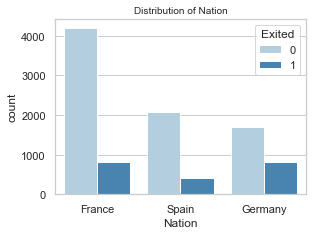

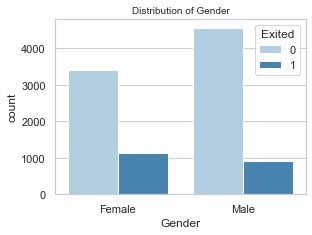

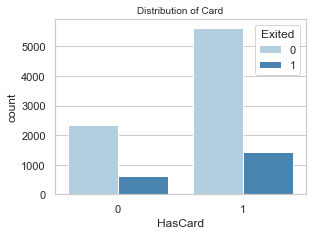

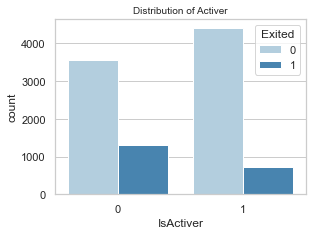

In [30]:
plt.rcParams['figure.figsize'] = (4,3)
sns.set(style = 'whitegrid')


sns.countplot(x=df['Nation'],hue = "Exited", data = df,palette = 'Blues')
plt.title('Distribution of Nation', fontsize = 10)
plt.show()

sns.countplot(x=df['Gender'],hue = "Exited", data = df,palette = 'Blues')
plt.title('Distribution of Gender', fontsize = 10)
plt.show()

sns.countplot(x=df['HasCard'],hue = "Exited", data = df,palette = 'Blues')
plt.title('Distribution of Card', fontsize = 10)
plt.show()

sns.countplot(x=df['IsActiver'],hue = "Exited", data = df,palette = 'Blues')
plt.title('Distribution of Activer', fontsize = 10)


plt.show()

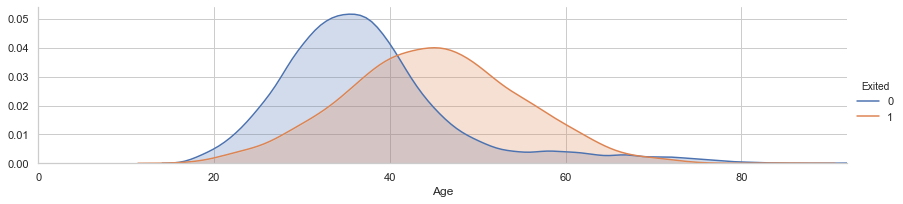

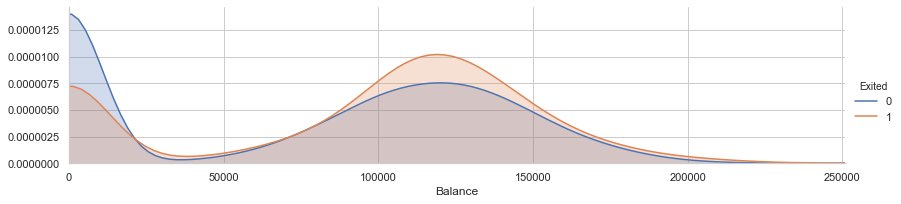

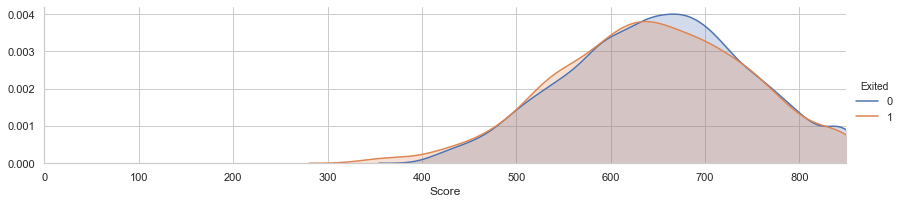

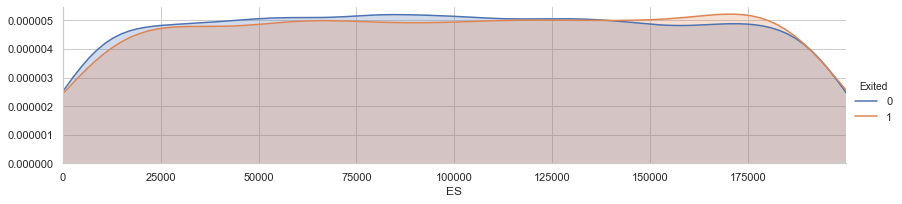

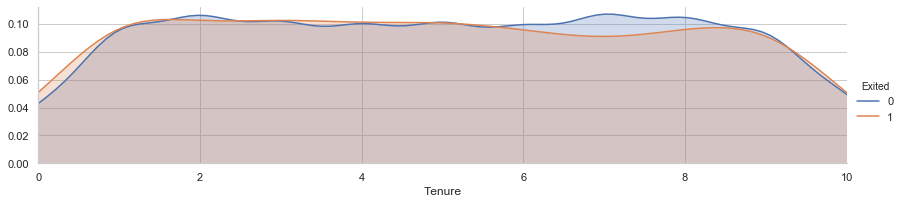

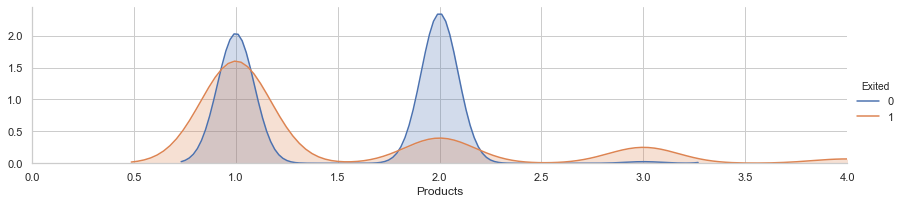

In [34]:
facet = sns.FacetGrid(df,hue="Exited",aspect = 4)

facet.map(sns.kdeplot,"Age",shade = True)
facet.set(xlim = (0,df["Age"].max()))
facet.add_legend()


facet = sns.FacetGrid(df,hue="Exited",aspect = 4)
facet.map(sns.kdeplot,"Balance",shade = True)
facet.set(xlim = (0,df["Balance"].max()))
facet.add_legend()

facet = sns.FacetGrid(df,hue="Exited",aspect = 4)
facet.map(sns.kdeplot,"Score",shade = True)
facet.set(xlim = (0,df["Score"].max()))
facet.add_legend()

facet = sns.FacetGrid(df,hue="Exited",aspect = 4)
facet.map(sns.kdeplot,"ES",shade = True)
facet.set(xlim = (0,df["ES"].max()))
facet.add_legend()

facet = sns.FacetGrid(df,hue="Exited",aspect = 4)
facet.map(sns.kdeplot,"Tenure",shade = True)
facet.set(xlim = (0,df["Tenure"].max()))
facet.add_legend()

facet = sns.FacetGrid(df,hue="Exited",aspect = 4)
facet.map(sns.kdeplot,"Products",shade = True)
facet.set(xlim = (0,df["Products"].max()))
facet.add_legend()

plt.show()

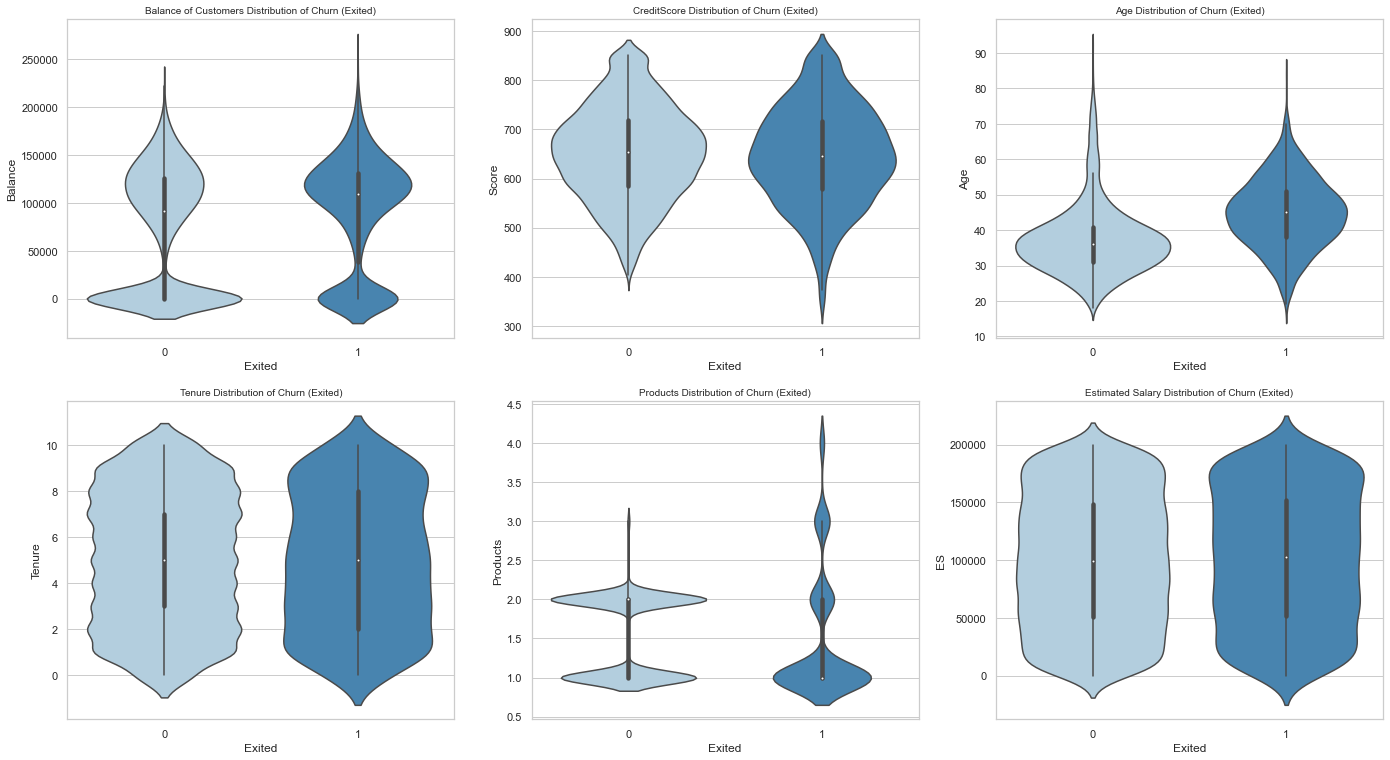

In [35]:
plt.rcParams['figure.figsize'] = (21,12)


plt.subplot(2, 3, 1)
sns.violinplot(data['Exited'], data['Balance'], palette = 'Blues')
plt.title('Balance of Customers Distribution of Churn (Exited)', fontsize = 10)


plt.subplot(2, 3, 2)
sns.violinplot(data['Exited'], data['Score'], palette = 'Blues')
plt.title('CreditScore Distribution of Churn (Exited)', fontsize = 10)


plt.subplot(2, 3, 3)
sns.violinplot(data['Exited'], data['Age'], palette = 'Blues')
plt.title('Age Distribution of Churn (Exited)', fontsize = 10)


plt.subplot(2, 3, 4)
sns.violinplot(data['Exited'], data['Tenure'], palette = 'Blues')
plt.title('Tenure Distribution of Churn (Exited)', fontsize = 10)


plt.subplot(2, 3, 5)
sns.violinplot(data['Exited'], data['Products'], palette = 'Blues')
plt.title('Products Distribution of Churn (Exited)', fontsize = 10)


plt.subplot(2, 3, 6)
sns.violinplot(data['Exited'], data['ES'], palette = 'Blues')
plt.title('Estimated Salary Distribution of Churn (Exited)', fontsize = 10)

plt.show()

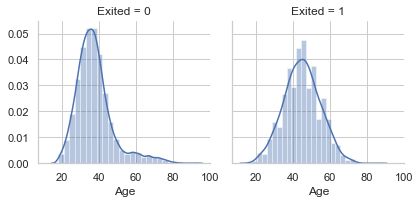

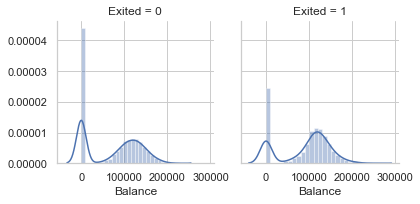

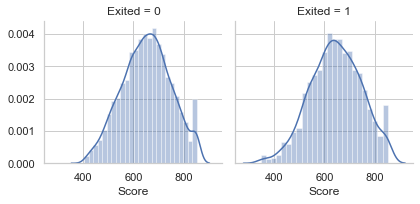

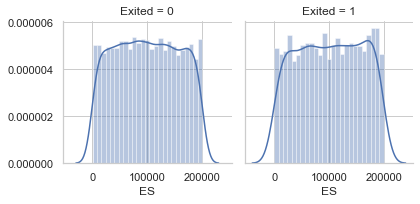

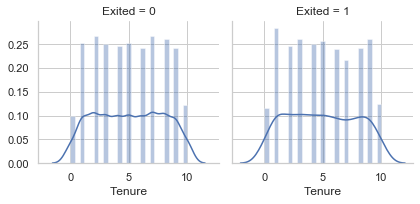

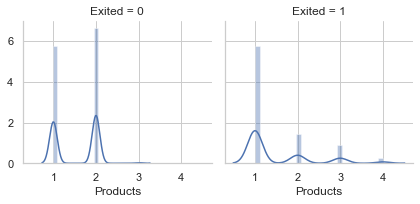

In [69]:
plt.rcParams['figure.figsize'] = (16, 9)
sns.set(style = 'whitegrid')


g= sns.FacetGrid(df, col = "Exited")
g.map(sns.distplot, "Age", bins = 25)


g= sns.FacetGrid(df, col = "Exited")
g.map(sns.distplot, "Balance", bins = 25)


g= sns.FacetGrid(df, col = "Exited")
g.map(sns.distplot, "Score", bins = 25)


g= sns.FacetGrid(df, col = "Exited")
g.map(sns.distplot, "ES", bins = 25)

g= sns.FacetGrid(df, col = "Exited")
g.map(sns.distplot, "Tenure", bins = 25)

g= sns.FacetGrid(df, col = "Exited")
g.map(sns.distplot, "Products", bins = 25)

plt.show()

In [36]:
for var in df:
    if var != 'Exited':
        if len(list(df[var].unique())) <= 11:
                print(pd.DataFrame({'Mean_Exited': df.groupby(var)['Exited'].mean()}), end = "\n\n\n")    

         Mean_Exited
Nation              
France      0.161548
Germany     0.324432
Spain       0.166734


        Mean_Exited
Gender             
Female     0.250715
Male       0.164559


        Mean_Exited
Tenure             
0          0.230024
1          0.224155
2          0.191794
3          0.211100
4          0.205258
5          0.206522
6          0.202689
7          0.172179
8          0.192195
9          0.216463
10         0.206122


          Mean_Exited
Products             
1            0.277144
2            0.075817
3            0.827068
4            1.000000


         Mean_Exited
HasCard             
0           0.208149
1           0.201843


           Mean_Exited
IsActiver             
0             0.268509
1             0.142691




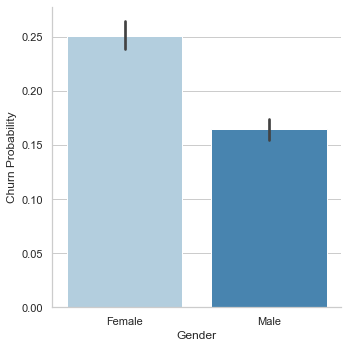

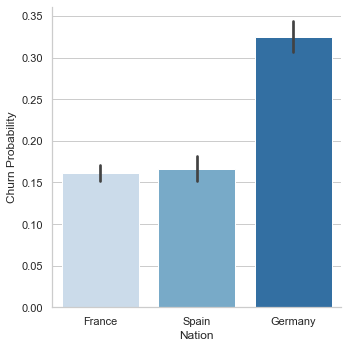

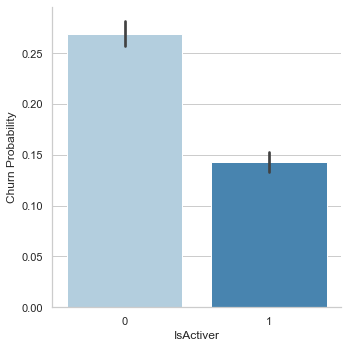

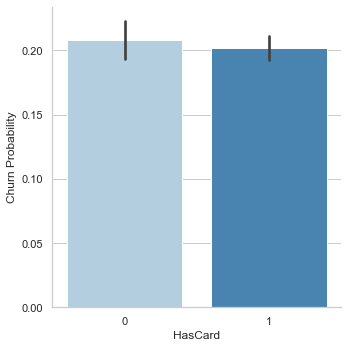

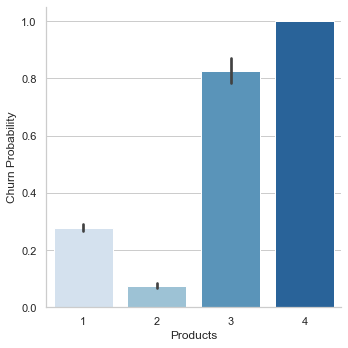

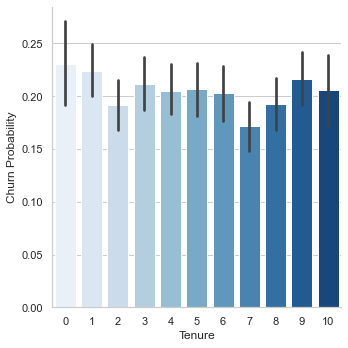

In [37]:
sns.set(style = 'whitegrid')


sns.factorplot(x = "Gender", y = "Exited", data = df, kind = "bar",palette = 'Blues')
plt.ylabel("Churn Probability")

sns.factorplot(x = "Nation", y = "Exited", data = df, kind = "bar",palette = 'Blues')
plt.ylabel("Churn Probability")

sns.factorplot(x = "IsActiver", y = "Exited", data = df, kind = "bar",palette = 'Blues')
plt.ylabel("Churn Probability")

sns.factorplot(x = "HasCard", y = "Exited", data = df, kind = "bar", palette = 'Blues')
plt.ylabel("Churn Probability")

sns.factorplot(x = "Products", y = "Exited", data = df, kind = "bar", palette = 'Blues')
plt.ylabel("Churn Probability")

sns.factorplot(x = "Tenure", y = "Exited", data = df, kind = "bar", palette = 'Blues')
plt.ylabel("Churn Probability")
plt.show()

### Pair Plot

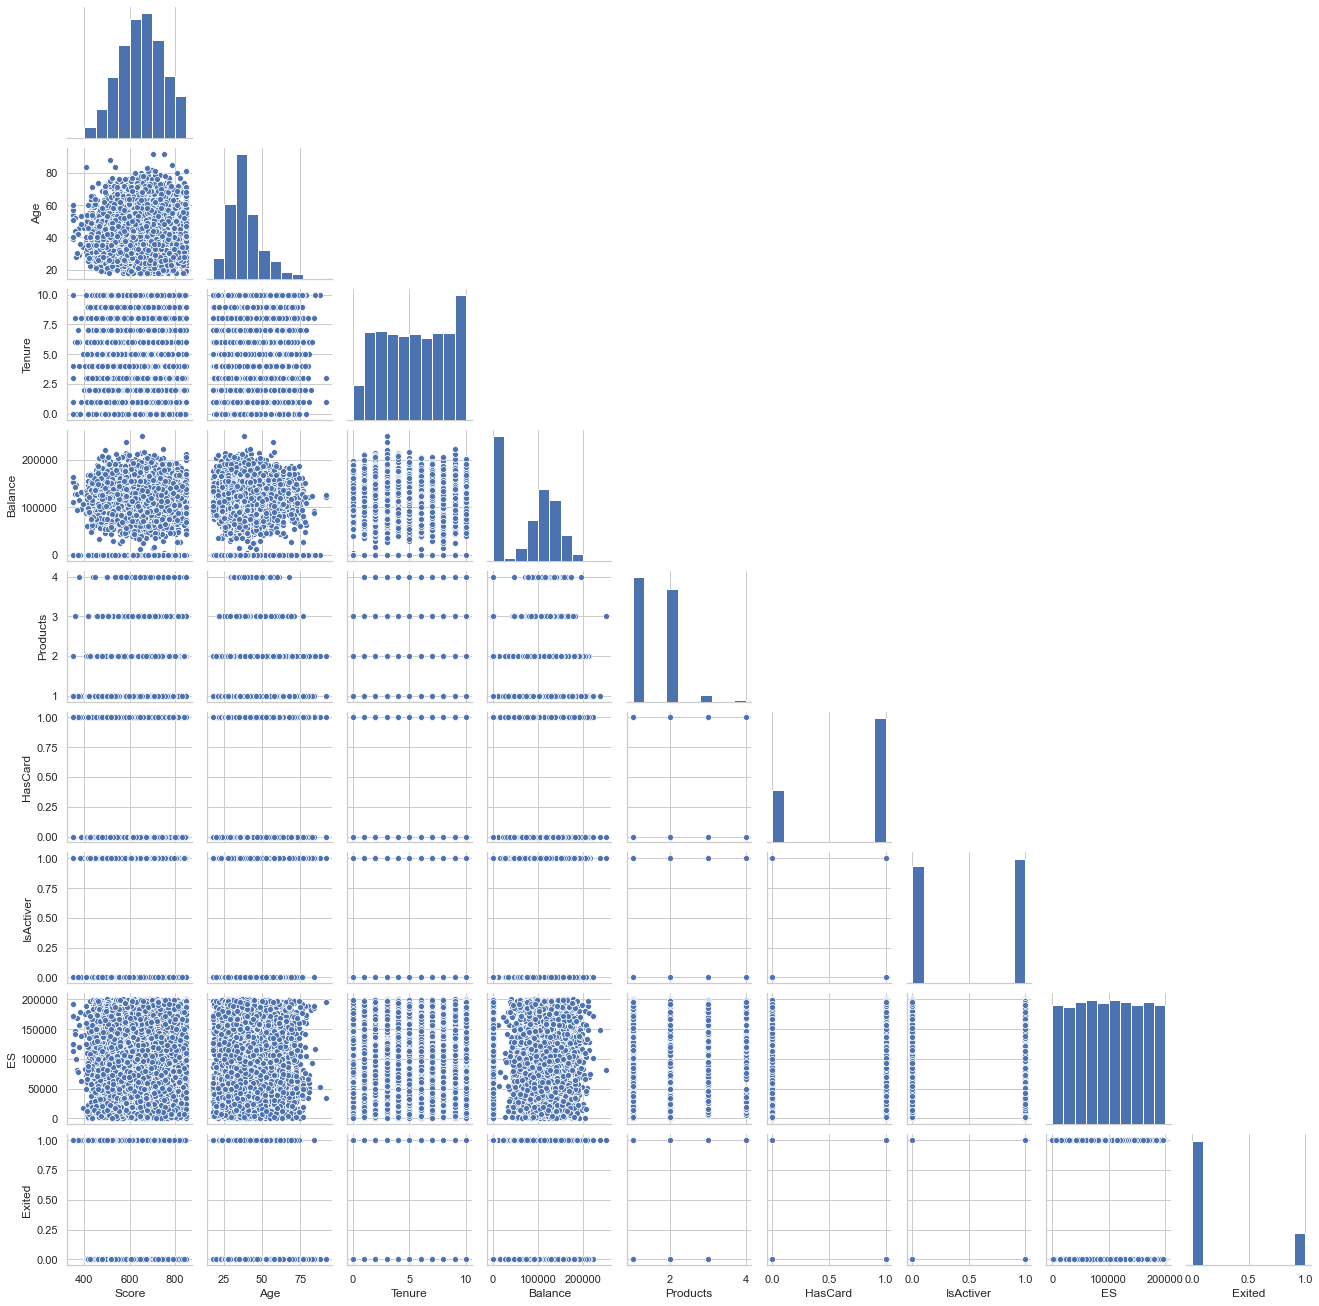

In [38]:
plt.rcParams['figure.figsize'] = (16, 9)
sns.set(style = 'whitegrid')
sns.pairplot(df,size = 2 ,kind ='scatter',corner=True)
plt.show()

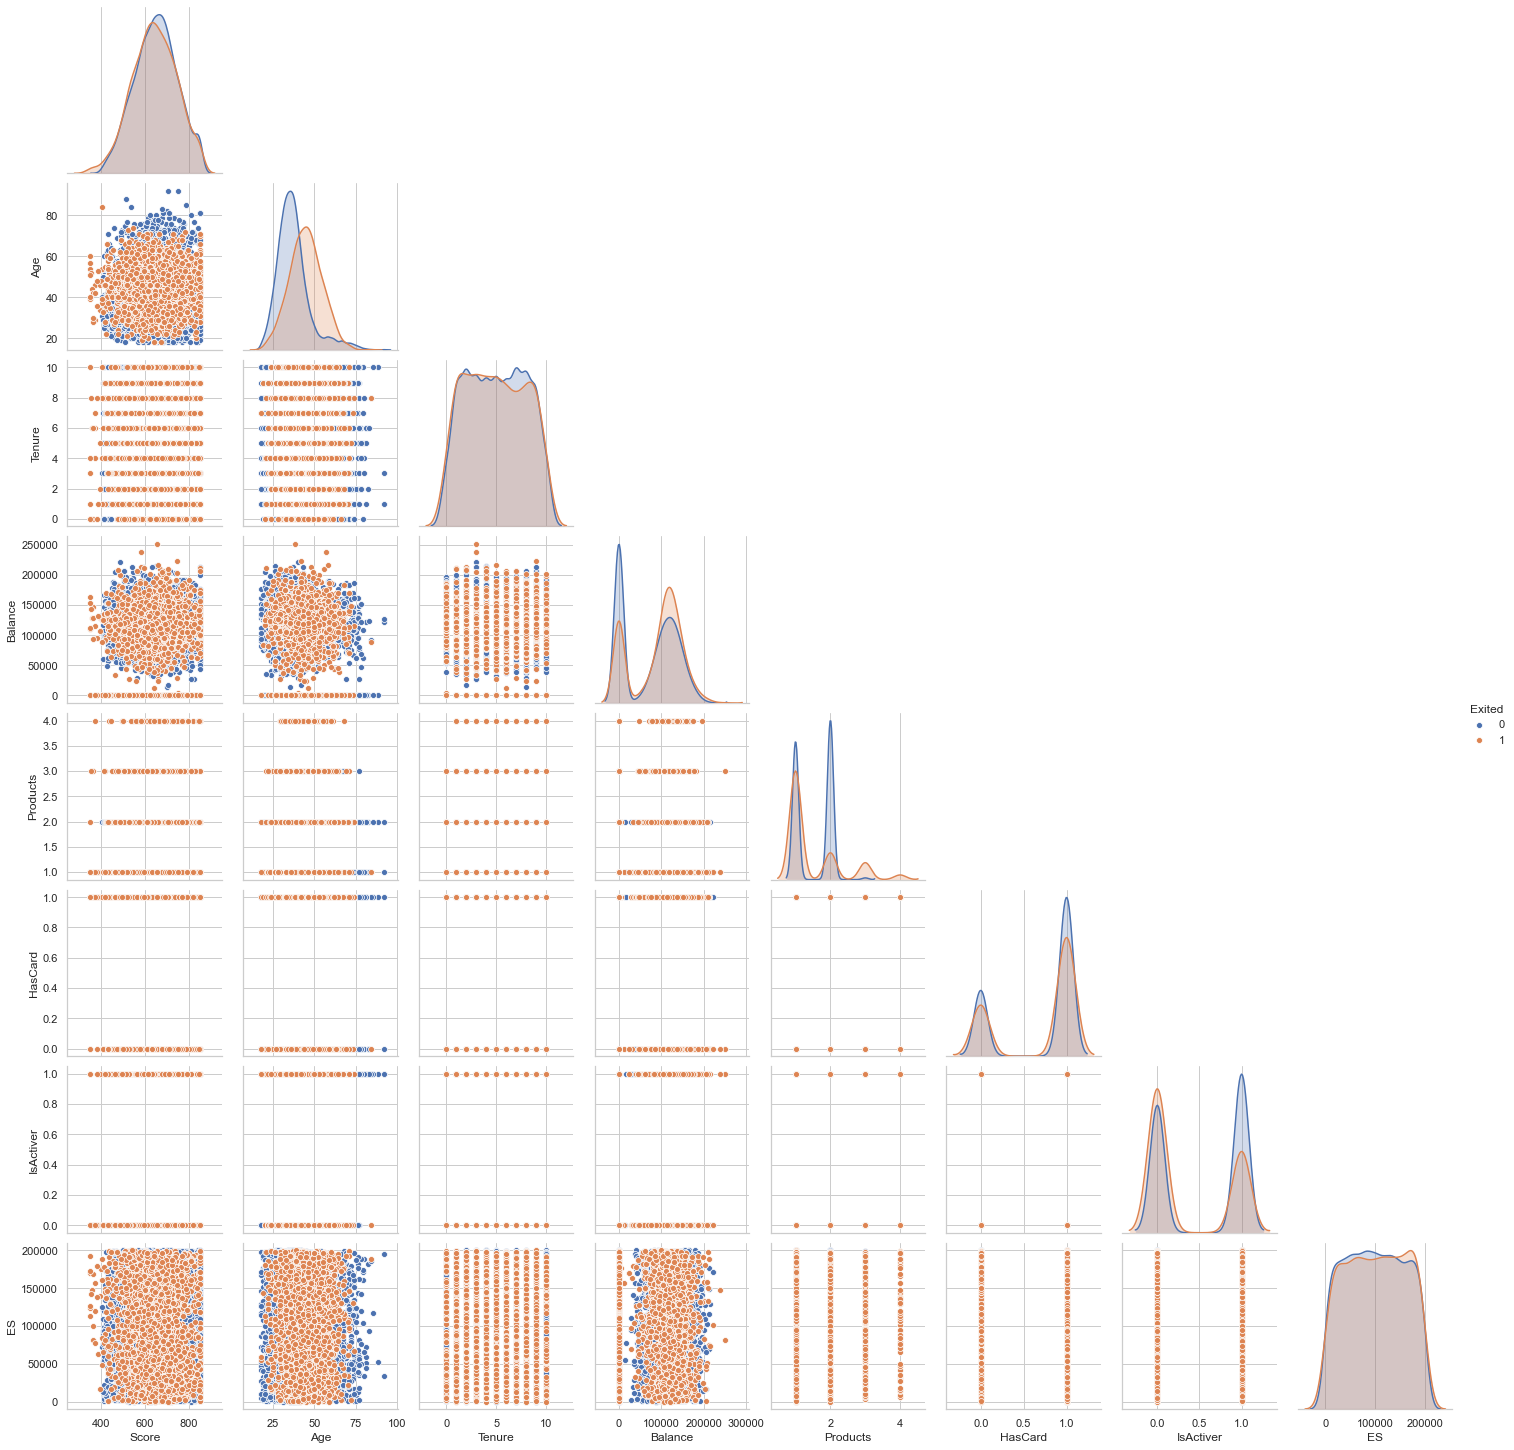

In [42]:
plt.rcParams['figure.figsize'] = (9, 9)
sns.pairplot(df,hue = 'Exited',corner=True)
plt.show()

In [42]:

fig = px.parallel_categories(df, dimensions=['Gender', 'Nation', 'Exited'],
                color="Exited", color_continuous_scale=px.colors.sequential.Inferno,
                labels={'Gender':'Gender(Female,Male)', 'Exited':'Exited(0:No,1:Yes)'})
fig.update_layout(title_text="Gender-Geography-Exited-Not Exited Schema")
fig.show()

* Around %20 of people exited.
* Females exited proportionally and numerically more (1139 Feamle/898 Male)
* Germans proportionally and numerically exited most(448 Female - 366 Male)
* French female numerically exited more (460)
* Frenchs continued with a bank numerically and proportionally most(5014 - 810 => 4196)

In [44]:
fig = px.parallel_categories(df, dimensions=['Gender','HasCard',"IsActiver", 'Exited'],
                color="Exited", color_continuous_scale=px.colors.sequential.Inferno,
                labels={'HasCrCard':'Has Credit Card', 'Gender':'Gender(Female,Male)', 'Exited':'Exited(0:No,1:Yes)'})
fig.update_layout(title_text="Credit Card-Gender-Exited-Not Exited Schema")
fig.show()